<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/productivity_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("/content/social_media_vs_productivity.csv")

In [2]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


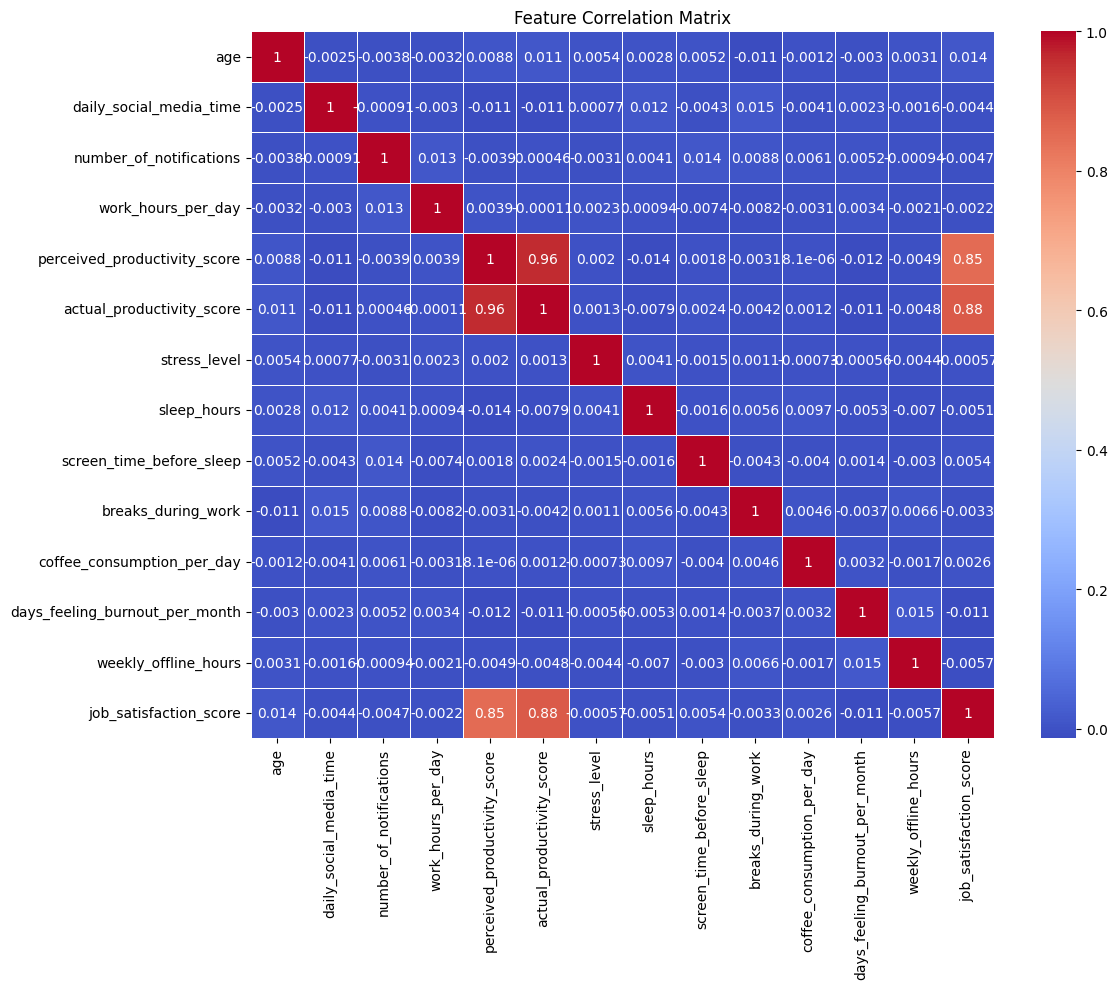

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [6]:
df.drop('perceived_productivity_score', axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   actual_productivity_score       27635 non-null  float64
 8   stress_level                    28096 non-null  float64
 9   sleep_hours                     27402 non-null  float64
 10  screen_time_before_sleep        27789 non-null  float64
 11  breaks_during_work              30000 non-null  int64  
 12  uses_focus_apps                 

In [8]:
df['social_platform_preference'].unique()

array(['Facebook', 'Twitter', 'Telegram', 'TikTok', 'Instagram'],
      dtype=object)

In [9]:
mapping = {
    "Facebook": 1,
    "Twitter": 2,
    "Telegram": 3,
    "TikTok": 4,
    "Instagram": 5,
}

df['social_platform_preference'] = df['social_platform_preference'].map(mapping)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  int64  
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   actual_productivity_score       27635 non-null  float64
 8   stress_level                    28096 non-null  float64
 9   sleep_hours                     27402 non-null  float64
 10  screen_time_before_sleep        27789 non-null  float64
 11  breaks_during_work              30000 non-null  int64  
 12  uses_focus_apps                 

In [12]:
print(df['job_type'].unique())
print(df['gender'].unique())

['Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student']
['Male' 'Female' 'Other']


In [13]:
# 'Unemployed' 'Health' 'Finance' 'IT' 'Education' 'Student'
map_job = {
    'Unemployed': 1,
    'Health': 2,
    'Finance': 3,
    'IT': 4,
    'Education': 5,
    'Student': 6
}

# 'Male' 'Female' 'Other'
map_gender = {
    'Male': 1,
    'Female': 2,
    'Other': 3
}

df['job_type'] = df['job_type'].map(map_job)
df['gender'] = df['gender'].map(map_gender)

In [15]:
df.dropna(inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18083 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             18083 non-null  int64  
 1   gender                          18083 non-null  int64  
 2   job_type                        18083 non-null  int64  
 3   daily_social_media_time         18083 non-null  float64
 4   social_platform_preference      18083 non-null  int64  
 5   number_of_notifications         18083 non-null  int64  
 6   work_hours_per_day              18083 non-null  float64
 7   actual_productivity_score       18083 non-null  float64
 8   stress_level                    18083 non-null  float64
 9   sleep_hours                     18083 non-null  float64
 10  screen_time_before_sleep        18083 non-null  float64
 11  breaks_during_work              18083 non-null  int64  
 12  uses_focus_apps                 18083

In [17]:
df['breaks_during_work'].unique()

array([ 8,  7,  5,  4,  2,  3,  6,  9, 10,  1,  0])

In [19]:
df.describe()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,41.476304,1.558093,3.503456,3.118382,3.008184,59.984848,6.991417,4.943980,5.518387,6.502354,1.025959,5.005641,2.007189,15.538517,10.389752,4.944841
std,13.848507,0.571399,1.708560,2.075257,1.411450,7.776371,1.998586,1.885867,2.869933,1.455693,0.655300,3.182025,1.411455,9.238324,7.250329,2.124373
min,18.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,2.000000,1.644111,2.000000,55.000000,5.652122,3.363304,3.000000,5.499978,0.526955,2.000000,1.000000,8.000000,4.640325,3.327896
50%,41.000000,2.000000,4.000000,3.031781,3.000000,60.000000,6.987823,4.937493,6.000000,6.502115,1.011073,5.000000,2.000000,15.000000,10.032885,4.941106
75%,53.000000,2.000000,5.000000,4.367503,4.000000,65.000000,8.354091,6.525916,8.000000,7.488873,1.477258,8.000000,3.000000,24.000000,15.326710,6.572626
max,65.000000,3.000000,6.000000,17.817948,5.000000,90.000000,12.000000,9.846258,10.000000,10.000000,3.000000,10.000000,9.000000,31.000000,40.964769,10.000000


In [20]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,1,1,4.180940,1,61,6.753558,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,1,2,3.249603,2,59,9.169296,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
5,38,1,3,1.512568,2,50,6.429312,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,2,1,4.381070,4,60,3.902309,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,2,5,4.089168,2,49,6.560467,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,34,1,4,3.562316,2,59,7.685305,2.932739,9.0,5.689819,2.333739,2,False,False,1,30,3.687407,2.123211
29992,44,2,1,1.648825,4,39,6.547262,5.164050,9.0,8.803968,0.305591,9,True,False,2,1,24.743560,6.073588
29996,39,1,2,4.437784,5,46,4.692862,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,1,5,17.724981,4,64,10.915036,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237


In [21]:
continuous_cols = [
    'age',
    'daily_social_media_time',
    'number_of_notifications',
    'work_hours_per_day',
    'actual_productivity_score',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'coffee_consumption_per_day',
    'days_feeling_burnout_per_month',
    'weekly_offline_hours',
    'job_satisfaction_score'
]

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Suppose df is your DataFrame
scaler = MinMaxScaler()

# Apply scaling
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [22]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,0.808511,1,1,0.234648,1,0.500000,0.562797,0.732476,0.333333,0.302364,0.139701,8,False,False,0.444444,0.354839,0.535267,0.633669
1,0.595745,1,2,0.182378,2,0.465517,0.764108,0.509797,0.666667,0.300557,0.223840,7,True,True,0.222222,0.806452,0.000000,0.341243
5,0.425532,1,3,0.084890,2,0.310345,0.535776,0.396276,0.444444,0.359322,0.506204,5,False,True,0.555556,0.064516,0.000000,0.456873
6,0.808511,2,1,0.245880,4,0.482759,0.325192,0.594757,0.666667,0.649978,0.750875,4,False,False,0.444444,0.645161,0.587942,0.550137
7,0.382979,2,5,0.229497,2,0.293103,0.546706,0.225156,0.333333,0.475072,0.249333,2,False,False,0.444444,0.935484,0.205534,0.344438


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Changed to Linear Regression
from sklearn.ensemble import RandomForestRegressor # Changed to Random Forest Regressor
from sklearn.tree import DecisionTreeRegressor # Changed to Decision Tree Regressor
from xgboost import XGBRegressor # Changed to XGBoost Regressor
from sklearn.metrics import mean_squared_error, r2_score # Changed to regression metrics
import numpy as np

X = df.drop(['actual_productivity_score'], axis=1)
y = df['actual_productivity_score']

for col in ['uses_focus_apps', 'has_digital_wellbeing_enabled']:
    if col in X.columns:
        X[col] = X[col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost Regressor": XGBRegressor(objective='reg:squarederror', random_state=42) # Objective for regression
}

for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} - Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print(f"{name} - R-squared (R2): {r2_score(y_test, y_pred):.4f}")
    print("-" * 60 + "\n")

--- Training Linear Regression ---

Linear Regression - Mean Squared Error (MSE): 0.0087
Linear Regression - R-squared (R2): 0.7814
------------------------------------------------------------

--- Training Decision Tree Regressor ---

Decision Tree Regressor - Mean Squared Error (MSE): 0.0171
Decision Tree Regressor - R-squared (R2): 0.5687
------------------------------------------------------------

--- Training Random Forest Regressor ---

Random Forest Regressor - Mean Squared Error (MSE): 0.0085
Random Forest Regressor - R-squared (R2): 0.7843
------------------------------------------------------------

--- Training XGBoost Regressor ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0093
XGBoost Regressor - R-squared (R2): 0.7658
------------------------------------------------------------



In [ ]:
# Exploring hyperparameter tuning for Random Forest Regressor

estm = [100, 200, 300, 400, 500]

for est in estm:
    print(f"--- Training {name} for estimator value: {est} ---")
    model = RandomForestRegressor(n_estimators=est, random_state=42).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} - Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
    print(f"{name} - R-squared (R2): {r2_score(y_test, y_pred):.4f}")
    print("-" * 60 + "\n")

--- Training XGBoost Regressor for estimator value: 100 ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0086
XGBoost Regressor - R-squared (R2): 0.7832
------------------------------------------------------------

--- Training XGBoost Regressor for estimator value: 200 ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0085
XGBoost Regressor - R-squared (R2): 0.7843
------------------------------------------------------------

--- Training XGBoost Regressor for estimator value: 300 ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0085
XGBoost Regressor - R-squared (R2): 0.7847
------------------------------------------------------------

--- Training XGBoost Regressor for estimator value: 400 ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0085
XGBoost Regressor - R-squared (R2): 0.7852
------------------------------------------------------------

--- Training XGBoost Regressor for estimator value: 500 ---

XGBoost Regressor - Mean Squared Error (MSE): 0.0085
XGBoost Re

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]  # 'auto' replaced with 'sqrt'
}


dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                          cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

params = {
    'max_depth': 5,
    'max_features': None,
    'min_samples_leaf': 8,
    'min_samples_split': 2
}

model = DecisionTreeRegressor(**params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f" Decision Tree w best parameters - Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f" Decision Tree w best parameters - R-squared (R2): {r2_score(y_test, y_pred):.4f}")
print("-" * 60 + "\n")

 Decision Tree w best parameters - Mean Squared Error (MSE): 0.0084
 Decision Tree w best parameters - R-squared (R2): 0.7888
------------------------------------------------------------

